# Import Library

In [1]:
from zipfile import ZipFile
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from keras import layers
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn  as sns 

# Import kaggle

In [2]:
pip install -q kaggle

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "alpiansyahrizqi"
os.environ['KAGGLE_KEY'] = "4ec2871806d4a125d51415bdc1e5a75a"

In [4]:
!kaggle datasets download -d alpiansyahrizqi/capstone-project

  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 19.6MB/s]


In [5]:
!unzip -q capstone-project.zip -d .


# Import dataset

In [6]:
df = pd.read_csv('/content/c22_007.csv')

In [7]:
df.head()

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,0,1.059463,17.217614,23.0,69.4125,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.439679
1,1,1.060776,16.639464,22.0,77.9625,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.149554
2,2,1.057177,18.228062,22.0,69.3000,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.473385
3,3,1.054530,19.403411,26.0,83.1375,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.686176
4,4,1.053868,19.698343,24.0,82.9125,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.315286


#  Exploratory Data Analysis

In [8]:
df.isnull().sum()

Unnamed: 0    0
Density       0
BodyFat       0
Age           0
Weight        0
Height        0
Neck          0
Chest         0
Abdomen       0
Hip           0
Thigh         0
Knee          0
Ankle         0
Biceps        0
Forearm       0
Wrist         0
BMI           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  252 non-null    int64  
 1   Density     252 non-null    float64
 2   BodyFat     252 non-null    float64
 3   Age         252 non-null    float64
 4   Weight      252 non-null    float64
 5   Height      252 non-null    float64
 6   Neck        252 non-null    float64
 7   Chest       252 non-null    float64
 8   Abdomen     252 non-null    float64
 9   Hip         252 non-null    float64
 10  Thigh       252 non-null    float64
 11  Knee        252 non-null    float64
 12  Ankle       252 non-null    float64
 13  Biceps      252 non-null    float64
 14  Forearm     252 non-null    float64
 15  Wrist       252 non-null    float64
 16  BMI         252 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 33.6 KB


In [10]:
df['Weight'] = df['Weight'] * 0.45  #1 lbs = 0.45 kg
df['Height'] = df['Height'] * 2.54  #1 inch = 2.54 cm

In [11]:
h_squared = (df['Height'] / 100) ** 2

df['BMI'] = df['Weight'] / h_squared #creating bmi

In [12]:
df

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,0,1.059463,17.217614,23.0,31.235625,437.0959,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.634921
1,1,1.060776,16.639464,22.0,35.083125,466.1281,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.614685
2,2,1.057177,18.228062,22.0,31.185000,427.4185,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.707022
3,3,1.054530,19.403411,26.0,37.411875,466.1281,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.721864
4,4,1.053868,19.698343,24.0,37.310625,459.6765,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.765745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,1.042255,24.931739,70.0,27.185625,432.2572,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,1.454973
248,248,1.020743,34.940714,72.0,40.702500,449.9991,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,2.010008
249,249,1.018008,36.243853,72.0,37.816875,425.8056,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,2.085753
250,250,1.025943,32.482744,72.0,38.626875,454.8378,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,1.867138


In [13]:
df.describe()

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,1.043832,24.269847,44.884921,36.137451,453.410512,37.967808,100.742163,92.428770,99.735268,59.328175,38.562500,23.038095,32.255605,28.675595,18.222222,1.755484
std,72.890329,0.011321,5.160921,12.602040,5.527930,17.148585,2.301730,8.161876,10.293612,6.438057,4.962811,2.321649,1.403545,2.958537,1.962956,0.911143,0.238236
min,0.000000,1.012335,12.440652,22.000000,23.996250,401.612100,31.862500,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,23.250000,15.800000,1.246782
25%,62.750000,1.037574,20.893605,35.750000,32.197500,440.321700,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,1.594017
50%,125.500000,1.044006,24.135207,43.000000,35.741250,451.612000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,1.736469
75%,188.250000,1.051193,27.074634,54.000000,39.892500,466.128100,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,1.891490
max,251.000000,1.070408,38.968420,81.000000,51.435000,501.611900,43.962500,121.912500,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000,2.614439


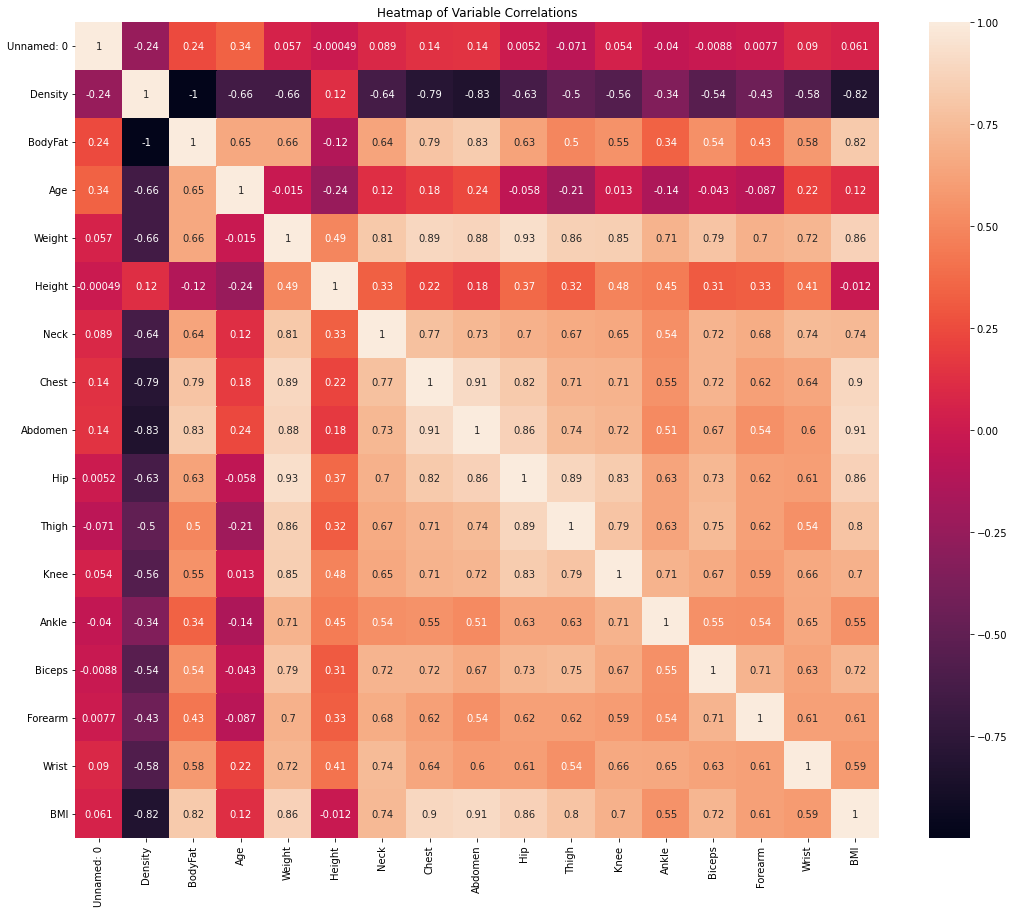

In [14]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

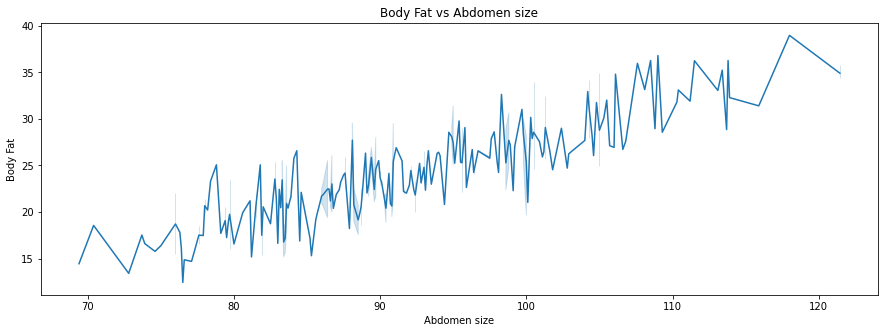

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Abdomen',y='BodyFat',data=df)
plt.title('Body Fat vs Abdomen size')
plt.xlabel('Abdomen size')
plt.ylabel('Body Fat')
plt.show()

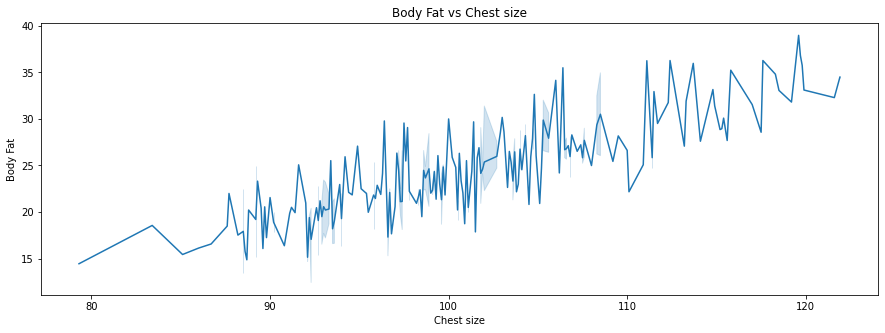

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Chest',y='BodyFat',data=df)
plt.title('Body Fat vs Chest size')
plt.xlabel('Chest size')
plt.ylabel('Body Fat')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


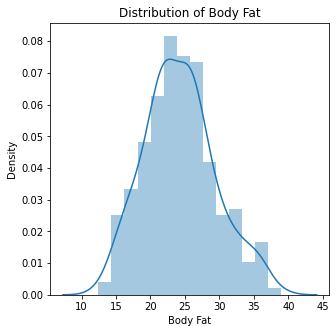

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(df['BodyFat'])
plt.title('Distribution of Body Fat')
plt.xlabel('Body Fat')
plt.show()

In [18]:
df['BodyFat'].describe()

count    252.000000
mean      24.269847
std        5.160921
min       12.440652
25%       20.893605
50%       24.135207
75%       27.074634
max       38.968420
Name: BodyFat, dtype: float64

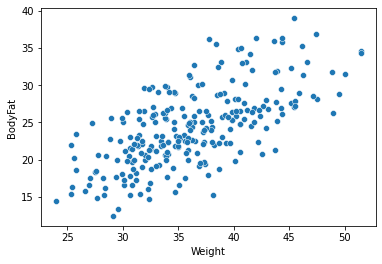

In [19]:
sns.scatterplot(x=df['Weight'],y=df['BodyFat'])

In [20]:
df['Weight'].describe()

count    252.000000
mean      36.137451
std        5.527930
min       23.996250
25%       32.197500
50%       35.741250
75%       39.892500
max       51.435000
Name: Weight, dtype: float64

In [21]:
# df = df[df.Weight != 163.417500 ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c3aa1f70>,
      dtype=object)

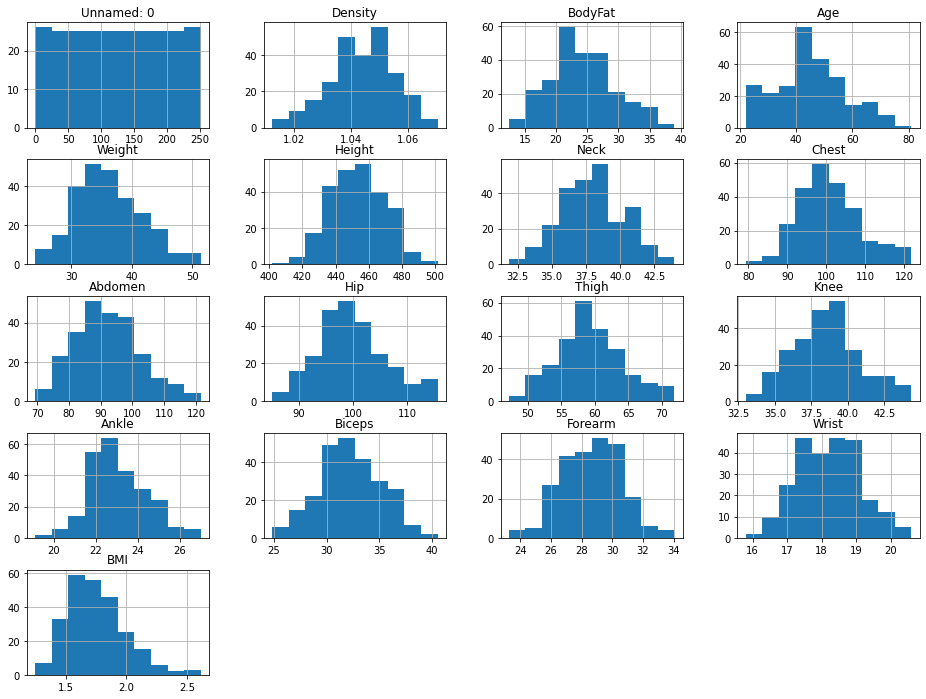

In [22]:
df.hist(figsize=(16,12))

In [23]:
df.columns

Index(['Unnamed: 0', 'Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck',
       'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps',
       'Forearm', 'Wrist', 'BMI'],
      dtype='object')

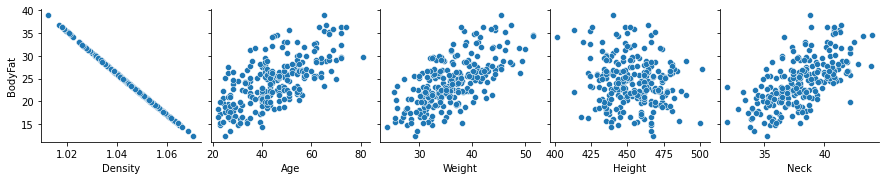

In [24]:
sns.pairplot(df,x_vars=['Density','Age','Weight','Height','Neck'],y_vars=['BodyFat'])

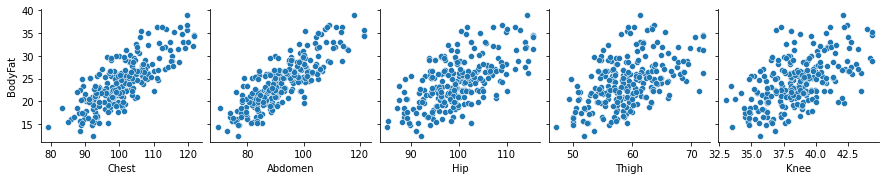

In [25]:
sns.pairplot(df,x_vars=['Chest','Abdomen','Hip','Thigh','Knee'],y_vars=['BodyFat'])

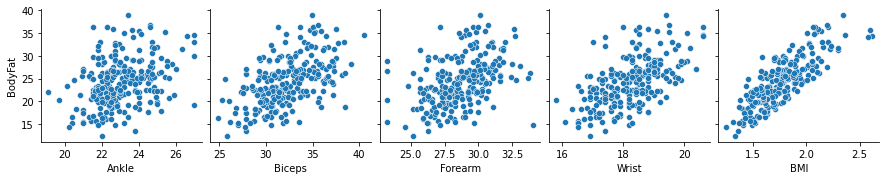

In [26]:
sns.pairplot(df,x_vars=['Ankle','Biceps','Forearm','Wrist','BMI'],y_vars=['BodyFat'])

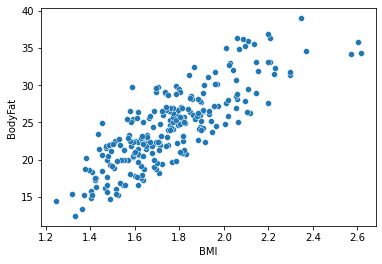

In [27]:
sns.scatterplot(x=df['BMI'],y=df['BodyFat'])

In [28]:
len(df.columns)

17

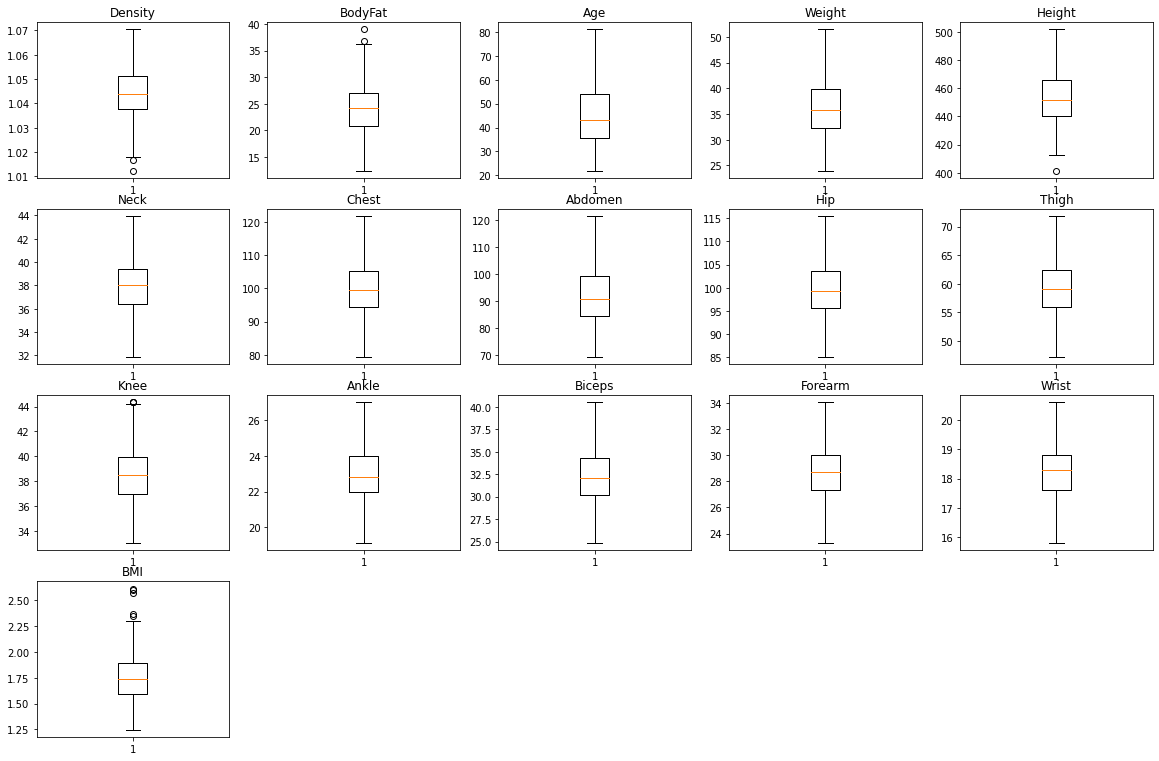

In [29]:
px = 1
plt.figure(figsize=(20,20))
for i in ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI']:
    if px<17:
        plt.subplot(6,5,px)
        plt.boxplot(df[i])
        plt.title(i)
        px=px+1

In [30]:
def outlier():
    l = ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI']
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]   
        lof = x[0]-1.5*iqr   
        upf = x[1]+1.5*iqr   
        df[i] = np.where(df[i]>upf,upf,(np.where(df[i]<lof,lof,df[i])))
outlier()

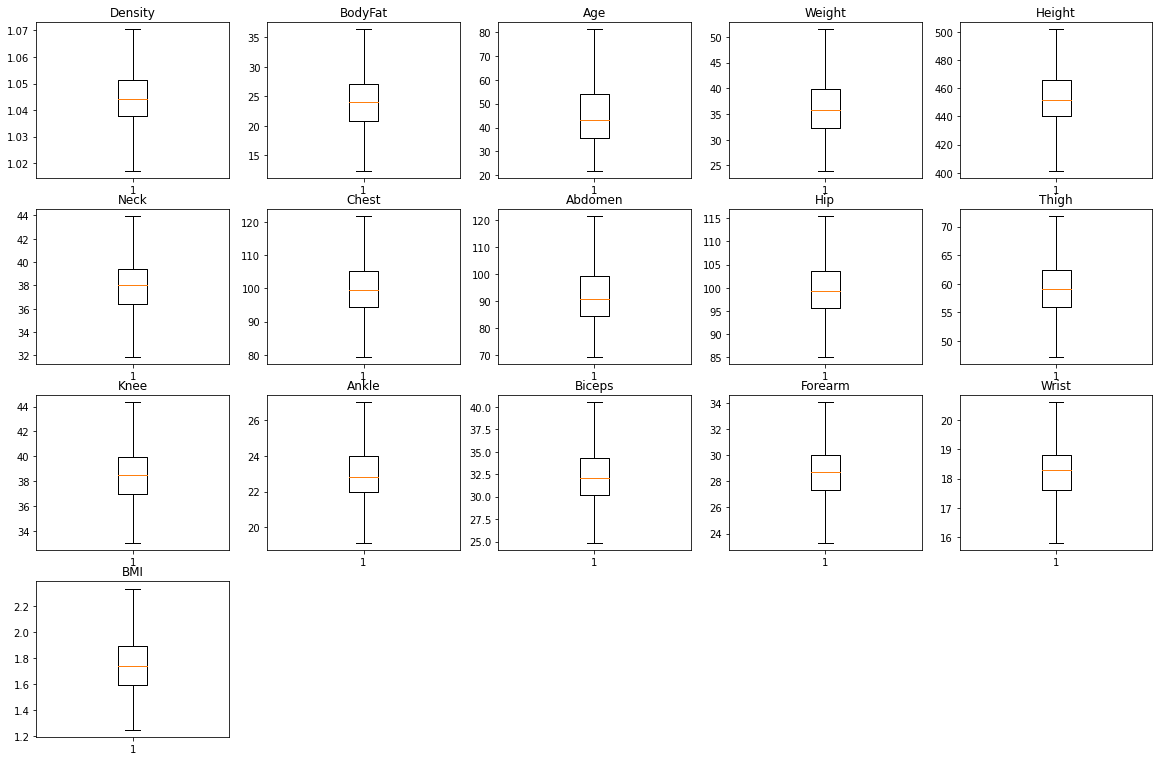

In [31]:
px = 1
plt.figure(figsize=(20,20))
for i in ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist', 'BMI']:
    if px<17:
        plt.subplot(6,5,px)
        plt.boxplot(df[i])
        plt.title(i)
        px=px+1

In [32]:
df.describe()

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,1.043853,24.257634,44.884921,36.137451,453.410512,37.967808,100.742163,92.428770,99.735268,59.328175,38.562500,23.038095,32.255605,28.675595,18.222222,1.752258
std,72.890329,0.011269,5.129383,12.602040,5.527930,17.148585,2.301730,8.161876,10.293612,6.438057,4.962811,2.321649,1.403545,2.958537,1.962956,0.911143,0.228401
min,0.000000,1.017144,12.440652,22.000000,23.996250,401.612100,31.862500,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,23.250000,15.800000,1.246782
25%,62.750000,1.037574,20.893605,35.750000,32.197500,440.321700,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,1.594017
50%,125.500000,1.044006,24.135207,43.000000,35.741250,451.612000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,1.736469
75%,188.250000,1.051193,27.074634,54.000000,39.892500,466.128100,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,1.891490
max,251.000000,1.070408,36.346177,81.000000,51.435000,501.611900,43.962500,121.912500,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000,2.337700


#MOdel 1 predict density

# Data preperation

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X = df[['Age','Weight','Height','Density','BMI']]
y = df['BodyFat']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [35]:
X_test

,Age,Weight,Height,Density,BMI
65,55.0,37.158750,435.4830,1.030907,1.959380
59,61.0,36.399375,424.1927,1.025626,2.022868
197,42.0,34.020000,461.2894,1.051032,1.598775
195,42.0,36.450000,440.3217,1.040344,1.879998
156,28.0,41.664375,445.1604,1.039017,2.102480
...,...,...,...,...,...
37,50.0,39.841875,440.3217,1.029847,2.054942
171,35.0,25.464375,422.5798,1.061359,1.425987
97,50.0,32.906250,429.0314,1.039793,1.787723
115,40.0,31.995000,446.7733,1.051901,1.602905


In [36]:
# scaler = StandardScaler()
# col = X_train.columns
# X_train = scaler.fit_transform(X_train[col])
# X_train = pd.DataFrame(X_train,columns=col)
# X_train.head()

In [37]:
# X_test = scaler.transform(X_test)
# X_test = pd.DataFrame(X_test,columns=col)
# X_test.head()

In [38]:
y_test.head()

65     30.159697
59     32.631961
197    20.965752
195    25.803985
156    26.411622
Name: BodyFat, dtype: float64

# Modeling dan Eval

In [39]:
from sklearn.linear_model import   ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso

In [40]:
# kernel = KernelRidge()
# lgbm = LGBMRegressor()
# random = RandomForestRegressor()
# elastic = ElasticNet()
# lasso  = Lasso()
# ridge = Ridge()
# svr=SVR()
# las = Lasso()
# grad = GradientBoostingRegressor()
# sgd = SGDRegressor()
bay = BayesianRidge()
# dtr = DecisionTreeRegressor()
# clf = [elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm,dtr]
# hashmap={}

In [41]:
# def compute(model):
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     r2=r2_score(y_test,y_pred)
#     rmse=np.sqrt(mean_squared_error(y_test,y_pred))
#     hashmap[str(model)]=(r2,rmse)

In [42]:
# for i in clf:
#     compute(i)

In [43]:
# score=pd.DataFrame(hashmap)
# score = score.transpose()
# score.columns=['R2_score','RMSE']
# score = score.sort_values('R2_score',ascending=False)

In [44]:
# score

In [45]:
testing = bay.fit(X_train,y_train.values)
y_pred = testing.predict(X_test)

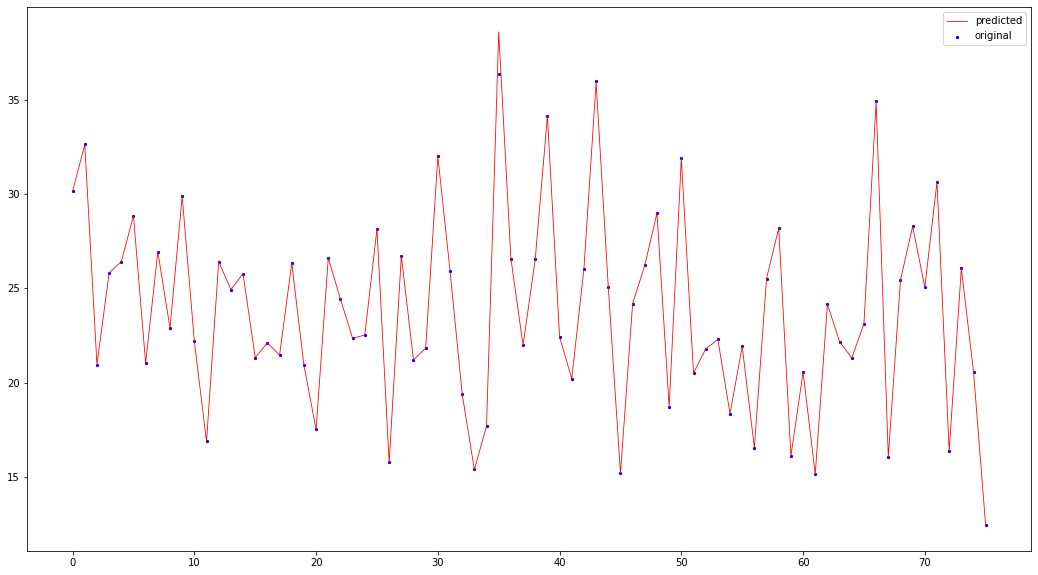

In [46]:
x_ax = range(len(y_test))
plt.figure(figsize=(18,10))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 


In [47]:
import pickle

In [48]:
pickle.dump(testing, open('bodyfat_prediction.pkl', 'wb'))

In [49]:
pickled_model = pickle.load(open('bodyfat_prediction.pkl', 'rb'))
pickled_model.predict(X_test)

array([30.15472148, 32.61686509, 20.96842701, 25.81150236, 26.41937273,
       28.84431005, 21.03819674, 26.94083548, 22.8965858 , 29.88275473,
       22.19544288, 16.88432303, 26.41826392, 24.93732302, 25.78109947,
       21.32590838, 22.11610555, 21.4608222 , 26.33170013, 20.93505923,
       17.52291149, 26.60695908, 24.43371793, 22.3526024 , 22.52815185,
       28.15179213, 15.76871374, 26.72332502, 21.21135741, 21.83596835,
       31.99587682, 25.94056059, 19.40411823, 15.39278862, 17.70562919,
       38.58520596, 26.58377676, 21.98640324, 26.54084773, 34.12049389,
       22.42811029, 20.21872966, 26.05007034, 35.91680685, 25.07042919,
       15.18141852, 24.20090734, 26.21860187, 28.99151953, 18.73293627,
       31.89213873, 20.50733418, 21.79205174, 22.29878088, 18.36450207,
       21.92566385, 16.56166661, 25.52702998, 28.18468218, 16.12428769,
       20.56282622, 15.16527224, 24.15670865, 22.17832917, 21.30999533,
       23.13509629, 34.90458408, 16.07252265, 25.43867098, 28.28

In [50]:
X_test

,Age,Weight,Height,Density,BMI
65,55.0,37.158750,435.4830,1.030907,1.959380
59,61.0,36.399375,424.1927,1.025626,2.022868
197,42.0,34.020000,461.2894,1.051032,1.598775
195,42.0,36.450000,440.3217,1.040344,1.879998
156,28.0,41.664375,445.1604,1.039017,2.102480
...,...,...,...,...,...
37,50.0,39.841875,440.3217,1.029847,2.054942
171,35.0,25.464375,422.5798,1.061359,1.425987
97,50.0,32.906250,429.0314,1.039793,1.787723
115,40.0,31.995000,446.7733,1.051901,1.602905


In [51]:
df.head()

,Unnamed: 0,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,0,1.059463,17.217614,23.0,31.235625,437.0959,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.634921
1,1,1.060776,16.639464,22.0,35.083125,466.1281,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.614685
2,2,1.057177,18.228062,22.0,31.185000,427.4185,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.707022
3,3,1.054530,19.403411,26.0,37.411875,466.1281,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.721864
4,4,1.053868,19.698343,24.0,37.310625,459.6765,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.765745


In [52]:
pickled_model.predict(np.array([(23.0,31.235625,437.0959,1.059463,1.634921)]).reshape(1,-1))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


array([17.21722066])

In [53]:
y_pred[0]

30.154721477453215